In [27]:
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import tensorflow as tf
import csv
from mpl_toolkits.mplot3d import axes3d

In [28]:
# Loading the csv file with pandas

filename = 'forestfires.csv'
df = pd.read_csv(filename)
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [29]:
# One hot encode the months and days

df['month'] = pd.Categorical(data['month'])
df['month'] = df.month.cat.codes

df['day'] = pd.Categorical(data['day'])
df['day'] = df.day.cat.codes

df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [30]:
# Check that the one hot encoding worked

df.dtypes

X          int64
Y          int64
month       int8
day         int8
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

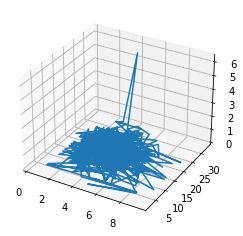

In [31]:
# Exploring the data
# The fields in the numpy array can be changed to any column in the dataset.

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(np.array(df.wind), np.array(df.temp), np.array([df.rain]))
plt.show()

In [32]:
target = df.pop('area')

In [33]:
dataset = tf.data.Dataset.from_tensor_slices((df.values, target.values))
values = 0
for element in dataset:
    values += 1
    print(element)
print(values)

t64, numpy=746.28>)
(<tf.Tensor: shape=(12,), dtype=float64, numpy=
array([  6. ,   3. ,   5. ,   5. ,  92.7, 164.1, 575.8,   8.9,  26.3,
        39. ,   3.1,   0. ])>, <tf.Tensor: shape=(), dtype=float64, numpy=7.02>)
(<tf.Tensor: shape=(12,), dtype=float64, numpy=
array([ 6. ,  5. ,  7. ,  6. , 93.4, 17.3, 28.3,  9.9, 13.8, 24. ,  5.8,
        0. ])>, <tf.Tensor: shape=(), dtype=float64, numpy=0.0>)
(<tf.Tensor: shape=(12,), dtype=float64, numpy=
array([  2. ,   4. ,   1. ,   3. ,  92. , 203.2, 664.5,   8.1,  24.9,
        42. ,   5.4,   0. ])>, <tf.Tensor: shape=(), dtype=float64, numpy=2.44>)
(<tf.Tensor: shape=(12,), dtype=float64, numpy=
array([  2. ,   5. ,   1. ,   3. ,  91.6, 181.3, 613. ,   7.6,  24.8,
        36. ,   4. ,   0. ])>, <tf.Tensor: shape=(), dtype=float64, numpy=3.05>)
(<tf.Tensor: shape=(12,), dtype=float64, numpy=
array([  8. ,   8. ,   1. ,   6. ,  91.7, 191.4, 635.9,   7.8,  26.2,
        36. ,   4.5,   0. ])>, <tf.Tensor: shape=(), dtype=float64, numpy=185.7

In [34]:
train_dataset = dataset.shuffle(len(df)).batch(5)
x = 0
for element in train_dataset:
    x += 1
    print(element)
print(x)

e=float64, numpy=
array([[8.000e+00, 3.000e+00, 1.100e+01, 5.000e+00, 8.440e+01, 7.340e+01,
        6.719e+02, 3.200e+00, 2.420e+01, 2.800e+01, 3.600e+00, 0.000e+00],
       [8.000e+00, 6.000e+00, 7.000e+00, 0.000e+00, 9.170e+01, 3.330e+01,
        7.750e+01, 9.000e+00, 8.300e+00, 9.700e+01, 4.000e+00, 2.000e-01],
       [9.000e+00, 4.000e+00, 5.000e+00, 1.000e+00, 9.230e+01, 9.210e+01,
        4.421e+02, 9.800e+00, 2.280e+01, 2.700e+01, 4.500e+00, 0.000e+00],
       [5.000e+00, 5.000e+00, 7.000e+00, 4.000e+00, 9.090e+01, 1.890e+01,
        3.060e+01, 8.000e+00, 1.160e+01, 4.800e+01, 5.400e+00, 0.000e+00],
       [6.000e+00, 4.000e+00, 1.100e+01, 5.000e+00, 9.100e+01, 1.295e+02,
        6.926e+02, 7.000e+00, 1.870e+01, 4.300e+01, 2.700e+00, 0.000e+00]])>, <tf.Tensor: shape=(5,), dtype=float64, numpy=array([  0.96,   0.  ,   1.63,   0.  , 103.39])>)
(<tf.Tensor: shape=(5, 12), dtype=float64, numpy=
array([[  8. ,   5. ,  10. ,   1. ,  84.9,  32.8, 664.2,   3. ,  16.7,
         47. ,   4

In [51]:
model = Sequential()
model.add(Dense(32, activation='sigmoid', input_shape=(12,)))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1))

In [52]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam', metrics=['accuracy'])

In [53]:
model.fit(train_dataset, epochs=16)

Epoch 1/16
104/104 [==============================] - 0s 3ms/step - loss: 198.1689 - accuracy: 0.4778
Epoch 2/16
104/104 [==============================] - 0s 2ms/step - loss: 198.1688 - accuracy: 0.4778
Epoch 3/16
104/104 [==============================] - 0s 2ms/step - loss: 198.1688 - accuracy: 0.4778
Epoch 4/16
104/104 [==============================] - 0s 3ms/step - loss: 198.1688 - accuracy: 0.4778
Epoch 5/16
104/104 [==============================] - 0s 2ms/step - loss: 198.1689 - accuracy: 0.4778
Epoch 6/16
104/104 [==============================] - 0s 3ms/step - loss: 198.1689 - accuracy: 0.4778
Epoch 7/16
104/104 [==============================] - 0s 3ms/step - loss: 198.1688 - accuracy: 0.4778
Epoch 8/16
104/104 [==============================] - 0s 3ms/step - loss: 198.1688 - accuracy: 0.4778
Epoch 9/16
104/104 [==============================] - 0s 3ms/step - loss: 198.1688 - accuracy: 0.4778
Epoch 10/16
104/104 [==============================] - 0s 2ms/step - loss: 198.168